In [3]:
import numpy as np # Númerica
import matplotlib.pyplot as plt # Gráficas
from scipy.interpolate import CubicSpline, lagrange, interp1d # Interpolación
from scipy.integrate import quad, dblquad, tplquad, trapezoid, simpson # Integración
import sympy as sp # Símbolos

# ⚠ Importante

👁 Puede usar unicamente las librerias vistas en clase (estas están en la parte superior) en caso de agregar una nueva, debe justificarla.

💀 No está permitido el uso de IA's en caso de hacerlo su parcial será **anulado**!

❗ Comente su código y funciones, esto hace parte de la nota.

✅ Responda ordenadamente y con claridad.


### Nombre: ___

# 1

**(30 puntos)** Sea la función $f(x) = 3^x$,

---

a. Defina una función llamada derivada (ver abajo) que encuentre el valor de la derivada en $x=2$ usando diferencias finitas centrales,

$$
f'(x) ≈ \frac{f(x+h) - f(x-h)}{2h}
$$

con una tolerancia menor a $10^{-8}$ y que retorne el valor de $f'(x=2)$ para cada valor de $h$. Tome con $h$ inicial 0.1.

---

b. Realice un gráfico logaritmico del error absoluto asociado a $f'(x)$ en función de $h$, conociendo que

$$
\frac{d}{dx}(b^x) = b^x\ln b
$$





```python
def derivada(f,x, tol = 1e-8):
'''
Recuerde hacer su documentación
'''

  return valor_derivada, h_valores
```



In [8]:
f = lambda x:3**x
y = np.linspace(0,2)
def derivada(f,x, tol = 1e-8):
  '''
En la siguiente funcion se busca encontrar el valor numerico de una derivada teniendo como entrada
  f: la funcion a evaluar
  x: respecto a que valor se busca el resultado
  tol: el error que debe alcanzar la funcion

  esta funcion devolvera
  valor_derivada: el resultado numerico de la derivada
  h_valores: una lista en la que se guardaron todos los valores de h hasta llegar al resultado
'''
  h = 0.1
  h0 = 1
  h_valores =[]
  while abs(valor_derivada) > tol:
    fx = (f(x+h)-f(x-h))/2*h
    valor_derivada = h0-fx
    if abs(valor_derivada)<tol:
      break
    else:
      h = fx
      h0 = valor_derivada
      h_valores.append(h)

  return valor_derivada, h_valores

In [ ]:
bx = lambda x: (3**x)*np.log10(3)
valor_derivada, h_valores1 = derivada(f,y)
valor_array = np.array(valor_derivada)
by = np.array(bx(y))
ya = np.array(y)
plt.loglog(ya, by, color = 'red', label = 'Derivada analitica')
plt.loglog(ya,valor_array, color = 'blue', label = 'Funcion para la derivada')
plt.legend()
plt.grid()
plt.show


In [11]:
valor_derivada1, h_valores = derivada(f,x=2)
bh = np.array(bx(h_valores))
harray = np.array(h_valores)
plt.loglog(bh,harray, color= 'green', label = 'Grafico de $f´(x)$ respecto a h')
plt.grid()
plt.legend()
plt.show


## 2

**(40 puntos)** Considere un fluido viscoso que fluye en régimen laminar a través de una tubería cilíndrica horizontal de radio $R = 1.0\ \text{cm}$. Se ha medido experimentalmente la velocidad axial del fluido en distintos radios desde el centro de la tubería ($r = 0$) hasta la pared ($r = R$). Los datos obtenidos son:

| $r$ (cm) | $v(r)$ (cm/s) |
|----------|---------------|
| 0.0      | 2.00          |
| 0.2      | 1.92          |
| 0.4      | 1.68          |
| 0.6      | 1.28          |
| 0.8      | 0.72          |
| 1.0      | 0.00          |

Con base en estos datos responda:

---

**a.** Encuentre una expresión para el polinomio interpolador de **Lagrange** para $v(r)$.

---

**b.** Usando las funciones obtenidas por **Lagrange** y **CubicSpline**, haga un gráfico donde se muestre el comportamiento de ambas interpolaciones, comparándolas con los datos experimentales.

---

**c.** Calcule la derivada $\frac{dv}{dr}$, correspondiente al **gradiente de velocidad radial** usando los datos procedentes de la interpolación CubicSpline. Use `np.gradient` con $h = 10^{-4}$.

---

**d.** Determine el **esfuerzo cortante** en el fluido, dado por:

$$
\tau(r) = \mu \frac{dv}{dr},
$$

donde $\mu = 0.001\ \text{Pa}\cdot\text{s}$ es la viscosidad dinámica del fluido. Grafique $\tau(r)$ para $r \in [0, 1]$.

---



In [27]:
r = (0,0.2,0.4,0.6,0.8,1.0)
v = (2,1.92,1.68,1.28,0.72,0)
polinterpolador = interp1d(r,v)
pollagrange = lagrange(r,v)
value_poli = polinterpolador(r)
value_poll = pollagrange(r)
print(f"Valores del polinomio contra lagrnage: {value_poli},{value_poll}")

Valores del polinomio contra lagrnage: [2.   1.92 1.68 1.28 0.72 0.  ],[ 2.000000e+00  1.920000e+00  1.680000e+00  1.280000e+00  7.200000e-01
 -1.687539e-14]


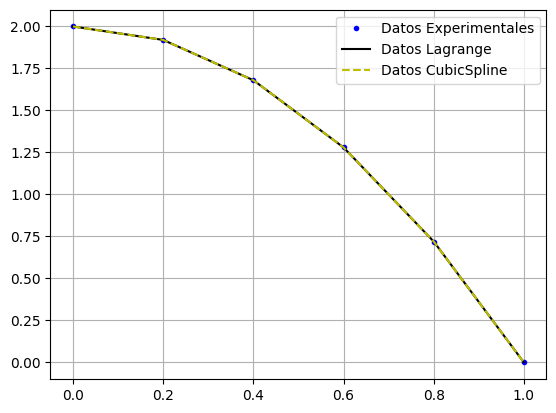

In [33]:
polcubicspline = CubicSpline(r,v, bc_type="natural")
value_polc = polcubicspline(r)
plt.plot(r,v, '.b', label = 'Datos Experimentales')
plt.plot(r,value_poll, '-0', label = 'Datos Lagrange')
plt.plot(r,value_polc, '--y', label = 'Datos CubicSpline')
plt.legend()
plt.grid()

In [35]:
x = np.array(value_polc)
np.gradient(x, 1e-4)

array([ -800., -1600., -3200., -4800., -6400., -7200.])

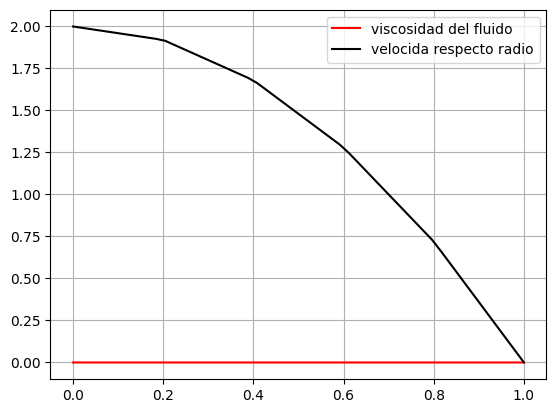

In [36]:
r = np.linspace(0,1,50)
v = polinterpolador(r)
mu = 0.001
t = lambda r: mu * np.gradient(polinterpolador(r))
plt.plot(r, t(r), color = 'red', label = 'viscosidad del fluido')
plt.plot(r,v, color = 'black', label = 'velocida respecto radio')
plt.grid()
plt.legend()

# 3

**(30 puntos)** Considere un sólido tetraédrico $R$ delimitado por los planos:

- $x = 0$, $y = 0$, $z = 0$,  
- y el plano $x + y + z = 1$.

Este sólido ocupa una región en el primer octante y está contenido completamente dentro del cubo unidad.

La densidad del sólido es variable y está dada por $\rho(x, y, z) = xyz$ [kg/m³].

Considere:


$$
\iiint_R f(x,y,z)\, dV = \int_0^1 \int_0^{1-x} \int_0^{1-x-y} f(x,y,z)\, dz\, dy\, dx
$$

con

$$
dV = dz\,dy\,dx
$$

---

a. Calcule la **masa total** del sólido:

$$
m = \iiint_R \rho(x, y, z)\, dV.
$$

Usando la forma iterativa de `quad`, compare su resultado con `tplquad`.

---

b. Calcule el **momento de inercia respecto a los ejes $x$ y $z$**, definidos como:

$$
I_z = \iiint_R (x^2 + y^2)\, \rho(x, y, z)\, dV.
$$

$$
I_x = \iiint_R (y^2 + z^2)\, \rho(x, y, z)\, dV.
$$

Puede usar la forma iterativa de `quad` o `tplquad`.





In [42]:

p = lambda z,y,x: x*y*z
def primera_integral(y,x):
  f = lambda z: x*y*z
  integral = quad(f,0,1 - x - y)
  return integral[0]
def segunda_integral(x):
  f = lambda y: primera_integral(y,x)
  integral = quad(f,0, 1 - x)
  return integral[0]

integral = quad(segunda_integral,0,1)

a = 0
b = 1
g = 0
h = lambda x:1-x
q = 0
r = lambda x,y:1-x-y

integral_tplquad = tplquad(p,a,b,g,h,q,r)

print(f"El valor con la forma iterativa es:{integral}, y el valor con tplquad es:{integral_tplquad}")

El valor con la forma iterativa es:(0.001388888888888889, 1.5419764230904953e-17), y el valor con tplquad es:(0.001388888888888889, 8.555839940243213e-17)


In [45]:
I_z = lambda z,y,x: ((x**2)+(y**2))*(x*y*z)
I_x = lambda z,y,x: ((y**2)+(z**2))*(x*y*z)
integral_iz = tplquad(I_z,a,b,g,h,q,r)
integral_ix = tplquad(I_x,a,b,g,h,q,r)

print(f"El momento de inercia en el eje z es:{integral_iz[0]}, el valor de la inercia en el eje x es:{integral_ix[0]}")

El momento de inercia en el eje z es:0.00029761904761904765, el valor de la inercia en el eje x es:0.00029761904761904765
